In [1]:
import numpy as np
from scipy.sparse import csc_array
import pickle
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
from tqdm.auto import tqdm

# Make the plots bigger
plt.rcParams['figure.figsize'] = [20, 20]
from scipy.ndimage import gaussian_filter
from datetime import datetime
import os



# Visualizing full matrix of amongi positions

In [2]:
with open('output/matrix_no_thres.pickle', 'rb') as handle:
    dict_matrix = pickle.load(handle)

In [3]:
dict_matrix.keys() #timestamp

dict_keys([1648822500, 1648826088, 1648829584, 1648833174, 1648836648, 1648839830, 1648843194, 1648846373, 1648849553, 1648852834, 1648856016, 1648859221, 1648862365, 1648865671, 1648868853, 1648872308, 1648875526, 1648878708, 1648882015, 1648885197, 1648888347, 1648891713, 1648894898, 1648898202, 1648901678, 1648904860, 1648908011, 1648911316, 1648914649, 1648918095, 1648921255, 1648924458, 1648927929, 1648931184, 1648935502, 1648938636, 1648941956, 1648945114, 1648948303, 1648951615, 1648954986, 1648958137, 1648961261, 1648964630, 1648968121, 1648971274, 1648974712, 1648978207, 1648981669, 1648985101, 1648988225, 1648991556, 1648994873, 1648998314, 1649001503, 1649004665, 1649007898, 1649011221, 1649014570, 1649017774, 1649020939, 1649024244, 1649027407, 1649030778, 1649034359, 1649037614, 1649040862, 1649044141, 1649047327, 1649050695, 1649054004, 1649057158, 1649060500, 1649063688, 1649066877, 1649070349, 1649073639, 1649076924, 1649080335, 1649083498, 1649086792, 1649090206, 16490

In [31]:
np.count_nonzero(dict_matrix[1648822500])

350

In [43]:
np.count_nonzero(array == 1)

195

In [ ]:
array = dict_matrix[1648822500]
np.unique(array)

array([0.   , 0.75 , 0.875, 1.   ], dtype=float32)

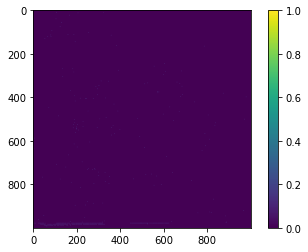

In [37]:
plt.imshow(array)
plt.colorbar()

In [38]:
array.astype('float16')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

### uso della soglia per discriminare i pattern trovati

In [51]:
threshold = 1
amogi_thres = (array >= threshold).astype("uint8") * 255
np.count_nonzero(amogi_thres)

195

In [50]:
n_amogi, _, _, _ = cv2.connectedComponentsWithStats(amogi_thres)

In [ ]:
# x,y = amogi_thres.nonzero()

### convertire il dict di array in un tensore 2000 * 2000 * n_timestamp

In [44]:
# usando numpy concatenate credo
# o arrayfromdict

# visualizzatore di immagini 
variando la threshold quanti amongi abbiamo in piu o in meno


In [4]:
def load_image(image_type: str, timestamp: int):
    if image_type == "single":
        image = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_single/0-{timestamp}.png")
    if image_type == "double":
        image_1 = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_double/0/0-{timestamp}.png")
        image_2 = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_double/1/1-{timestamp}.png")
        image = np.concatenate((image_1, image_2), axis=1)
    if image_type == "quadro":
        image_1 = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_quadro/0/0-{timestamp}.png")
        image_2 = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_quadro/1/1-{timestamp}.png")
        image_12 = np.concatenate((image_1, image_2), axis=1)
        image_3 = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_quadro/2/2-{timestamp}.png")
        image_4 = cv2.imread(f"data/kaggle/input/reddit-rplace-2022-history/images_quadro/3/3-{timestamp}.png")
        image_34 = np.concatenate((image_3, image_4), axis=1)
        image = np.concatenate((image_12, image_34))
    return cv2.cvtColor(
        image,
        cv2.COLOR_BGR2RGB
    )

def autoload_image(timestamp: int):
    if f"0-{timestamp}.png" in os.listdir("data/kaggle/input/reddit-rplace-2022-history/images_quadro/0"):
        return load_image("quadro", timestamp)
    if f"0-{timestamp}.png" in os.listdir("data/kaggle/input/reddit-rplace-2022-history/images_double/0"):
        return load_image("double", timestamp)
    if f"0-{timestamp}.png" in os.listdir("data/kaggle/input/reddit-rplace-2022-history/images_single"):
        return load_image("single", timestamp)
    raise ValueError(f"No image found for timestamp {timestamp}")

In [14]:
%matplotlib notebook


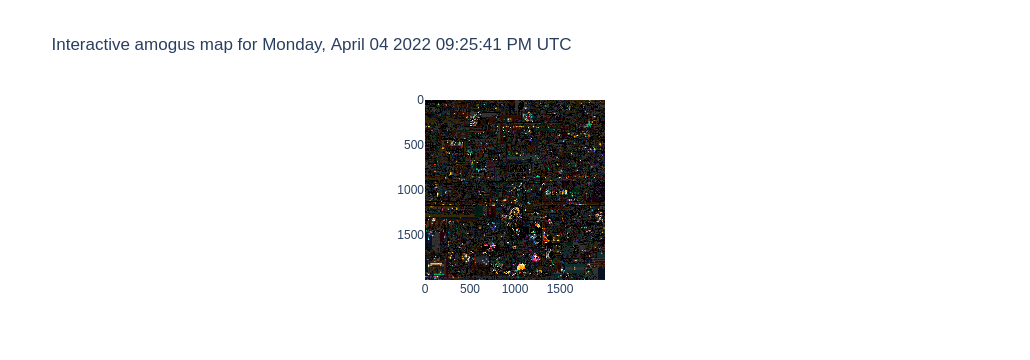

In [16]:
def interactive_amogus_map(timestamp):
    amogi = dict_matrix[timestamp]
    threshold = 0.5
#amogi = (amogi >= threshold).astype("uint8") * 255
    amogi = (amogi >= threshold).astype("float64") * 255
    image = autoload_image(timestamp)


    spotlight = gaussian_filter(amogi, sigma=5)
    spotlight /= 0.2 * np.max(spotlight)
    spotlight = spotlight.clip(0, 1)
    spotlight = 0.2 + 0.8 * spotlight
    datestring = datetime.fromtimestamp(timestamp).strftime("%A, %B %d %Y %I:%M:%S %p UTC")
    fig = px.imshow(image.astype("float32") * spotlight[..., np.newaxis] / 255, title=f"Interactive amogus map for {datestring}")
    #plt.figure(figsize = (20,20))

    #fig = plt.imshow(image.astype("float32") * spotlight[..., np.newaxis] / 255)#title=f"Interactive amogus map for {datestring}")
    fig.show()

interactive_amogus_map(1649100341)


# Amongi coords with nonzero

In [20]:
os.listdir("data/kaggle/input/reddit-rplace-2022-history/images_quadro/0")

['0-1649026647.png',
 '0-1649122308.png',
 '0-1649110843.png',
 '0-1649051988.png',
 '0-1649124680.png',
 '0-1649135639.png',
 '0-1649091633.png',
 '0-1649136983.png',
 '0-1649073070.png',
 '0-1649026963.png',
 '0-1649118558.png',
 '0-1649128333.png',
 '0-1649126929.png',
 '0-1649120339.png',
 '0-1649032709.png',
 '0-1649088338.png',
 '0-1649041272.png',
 '0-1649104187.png',
 '0-1649139199.png',
 '0-1649130052.png',
 '0-1649118308.png',
 '0-1649111001.png',
 '0-1649136452.png',
 '0-1649105463.png',
 '0-1649053439.png',
 '0-1649019957.png',
 '0-1649028732.png',
 '0-1649047453.png',
 '0-1649143041.png',
 '0-1649120964.png',
 '0-1649048430.png',
 '0-1649130146.png',
 '0-1649094397.png',
 '0-1649097669.png',
 '0-1649079423.png',
 '0-1649076860.png',
 '0-1649108755.png',
 '0-1649121620.png',
 '0-1649128239.png',
 '0-1649023580.png',
 '0-1649017109.png',
 '0-1649058985.png',
 '0-1649113172.png',
 '0-1649132705.png',
 '0-1649109775.png',
 '0-1649100851.png',
 '0-1649046128.png',
 '0-164901346

In [9]:
with open('amogi_by_time (1).pickle', 'rb') as handle:
    b = pickle.load(handle)

In [18]:
heatmap = np.zeros(shape = (2000,2000))
for key in b.keys():
    x = b[key][0]
    y = b[key][1]
    val = b[key][2]
    data = np.ones((len(x)),dtype='uint8')
    layer = csc_array((data, (x, y)),shape = (2000,2000)).toarray()
    print(len(layer.nonzero()[0]))
    heatmap =+ layer 
    break

350


In [12]:
x,y = heatmap.nonzero()
x.shape

(0,)

In [11]:
key = 1648822500
x = b[key][0]
y = b[key][1]
val = b[key][2]

data = np.ones((len(x)),dtype='uint8')

In [17]:
heatmap = csc_array((data, (x, y)),shape = (2000,2000)).toarray()
heatmap.shape

(2000, 2000)